In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [14]:
#loading data_sets from the folder
train_set = pd.read_csv("california_housing_train.csv")
test_set = pd.read_csv("california_housing_test.csv")

In [15]:
#Scale the label values
#The following code cell scales the median_house_value
scale = 1000.0
train_set["median_house_value"] = train_set["median_house_value"] / scale
test_set["median_house_value"] = test_set["median_house_value"] / scale
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Load the functions that build and train a model
The following code cell defines two functions:

build_model, which defines the model's topography.
train_model, which will ultimately train the model, outputting not only the loss value for the training set but also the loss value for the validation set.
Since you don't need to understand model building code right now, we've hidden this code cell. As always, you must run hidden code cells.



In [16]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [17]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Task 1: Experiment with the validation split
In the following code cell, you'll see a variable named validation_split, which we've initialized at 0.2. The validation_split variable specifies the proportion of the original training set that will serve as the validation set. The original training set contains 17,000 examples. Therefore, a validation_split of 0.2 means that:

17,000 * 0.2 ~= 3,400 examples will become the validation set.
17,000 * 0.8 ~= 13,600 examples will become the new training set.
The following code builds a model, trains it on the training set, and evaluates the built model on both:

The training set.
And the validation set.
If the data in the training set is similar to the data in the validation set, then the two loss curves and the final loss values should be almost identical. However, the loss curves and final loss values are not almost identical. Hmm, that's odd.

Experiment with two or three different values of validation_split. Do different values of validation_split fix the problem?

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 37163.3242 - root_mean_squared_error: 192.7779 - val_loss: 44961.9297 - val_root_mean_squared_error: 212.0423
Epoch 2/30
136/136 [==============================] - 0s 1ms/step - loss: 20973.5215 - root_mean_squared_error: 144.8224 - val_loss: 25876.6895 - val_root_mean_squared_error: 160.8623
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 11102.0957 - root_mean_squared_error: 105.3665 - val_loss: 14010.8896 - val_root_mean_squared_error: 118.3676
Epoch 4/30
136/136 [==============================] - 0s 1ms/step - loss: 6957.0576 - root_mean_squared_error: 83.4090 - val_loss: 9327.5898 - val_root_mean_squared_error: 96.5794
Epoch 5/30
136/136 [==============================] - 0s 1ms/step - loss: 6512.8623 - root_mean_squared_error: 80.7023 - val_loss: 9363.5391 - val_root_mean_squared_error: 96.7654
Epoch 6/30
136/136 [==============================] - 0s 1ms/step - loss: 6513.7812 - ro

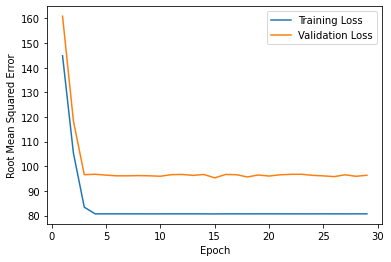

In [18]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_set, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

Task 2: Determine why the loss curves differ
No matter how you split the training set and the validation set, the loss curves differ significantly. Evidently, the data in the training set isn't similar enough to the data in the validation set. Counterintuitive? Yes, but this problem is actually pretty common in machine learning.

Task 3. Fix the problem
To fix the problem, shuffle the examples in the training set before splitting the examples into a training set and validation set. To do so, take the following steps:

Shuffle the data in the training set by adding the following line anywhere before you call train_model (in the code cell associated with Task 1):
  shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
Pass shuffled_train_df (instead of train_df) as the second argument to train_model (in the code call associated with Task 1) so that the call becomes as follows:
  epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                      my_label, epochs, batch_size, 
                                      validation_split)

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
136/136 [==============================] - 1s 2ms/step - loss: 43541.1289 - root_mean_squared_error: 208.6651 - val_loss: 34503.0156 - val_root_mean_squared_error: 185.7499
Epoch 2/30
136/136 [==============================] - 0s 1ms/step - loss: 25432.2227 - root_mean_squared_error: 159.4748 - val_loss: 19238.9395 - val_root_mean_squared_error: 138.7045
Epoch 3/30
136/136 [==============================] - 0s 1ms/step - loss: 13655.8125 - root_mean_squared_error: 116.8581 - val_loss: 10292.3408 - val_root_mean_squared_error: 101.4512
Epoch 4/30
136/136 [==============================] - 0s 1ms/step - loss: 7983.7666 - root_mean_squared_error: 89.3519 - val_loss: 7340.3501 - val_root_mean_squared_error: 85.6758
Epoch 5/30
136/136 [==============================] - 0s 1ms/step - loss: 6955.2754 - root_mean_squared_error: 83.3983 - val_loss: 7272.7261 - val_root_mean_squared_error: 85.2803
Epoch 6/30
136/136 [==============================] - 0s 1ms/step - loss: 6950.1929 - ro

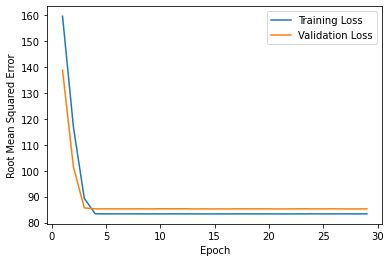

In [22]:
learning_rate = 0.08
epochs = 30
batch_size = 100
validation_split = 0.2
#shuffling data in the training set
train_shuffle_data = train_set.reindex(np.random.permutation(train_set.index))
my_feature = "median_income"
my_label = "median_house_value"
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_shuffle_data, my_feature,my_label, epochs, batch_size, validation_split)
plot_the_loss_curve(epochs, history["root_mean_squared_error"], history["val_root_mean_squared_error"])

In [23]:
# Yes, after shuffling the original training set, 
# the final loss for the training set and the 
# validation set become much closer.

# If validation_split < 0.15,
# the final loss values for the training set and
# validation set diverge meaningfully.  Apparently,
# the validation set no longer contains enough examples. 

Task 4: Use the Test Dataset to Evaluate Your Model's Performance
The test set usually acts as the ultimate judge of a model's quality. The test set can serve as an impartial judge because its examples haven't been used in training the model. Run the following code cell to evaluate the model with the test set:

x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

Compare the root mean squared error of the model when evaluated on each of the three datasets:

training set: look for root_mean_squared_error in the final training epoch.
validation set: look for val_root_mean_squared_error in the final training epoch.
test set: run the preceding code cell and examine the root_mean_squared_error.
Ideally, the root mean squared error of all three sets should be similar. Are they?